### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Preparing Data 
#### 3. Exploring Relationships
     Correlation heatmaps
     Scatterplots
     Pair Plots
     Categorical Plot
#### 4. Questions So Far?
#### 5. Hypotheses So Far

## 1. Importing Visualization Libraries and Data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# ensure that charts are displayed without having to call them
%matplotlib inline

In [3]:
#define path
path = r"C:\Users\Asus 17\OneDrive\Desktop\Achievement 6\amsterdam"

In [4]:
# import listings_numeric
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'listings_numeric.csv'))

## 2. Preparing Data

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'host_id', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count'],
      dtype='object')

In [6]:
#create a subset of the listing variables
sub_list = df[['price', 'square_feet', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'calculated_host_listings_count']] 

In [7]:
#create a subset of the rating variables
sub_rate = df[['price', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value']]

In [8]:
#take a look
sub_list.head()

,price,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,calculated_host_listings_count
0,59.0,NaN,NaN,1.0,100.0,50.0,1,20.0,3,15,248,1
1,160.0,NaN,543.0,2.0,300.0,40.0,2,15.0,4,20,42,1
2,80.0,NaN,NaN,NaN,NaN,NaN,2,0.0,1,1000,233,2
3,125.0,NaN,650.0,2.0,300.0,40.0,2,10.0,14,60,1,2
4,150.0,NaN,810.0,2.0,0.0,0.0,1,0.0,2,730,171,1


In [9]:
sub_list.shape

(20030, 12)

In [10]:
sub_rate.shape

(20030, 9)

In [11]:
sub_rate.head()

,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,59.0,248,97.0,10.0,10.0,10.0,10.0,9.0,10.0
1,160.0,42,96.0,10.0,9.0,10.0,10.0,9.0,9.0
2,80.0,233,87.0,9.0,10.0,9.0,9.0,10.0,9.0
3,125.0,1,100.0,10.0,10.0,10.0,10.0,10.0,10.0
4,150.0,171,99.0,10.0,10.0,10.0,10.0,10.0,10.0


## 3. Exploring relationships

### Create a correlation matrix heatmap

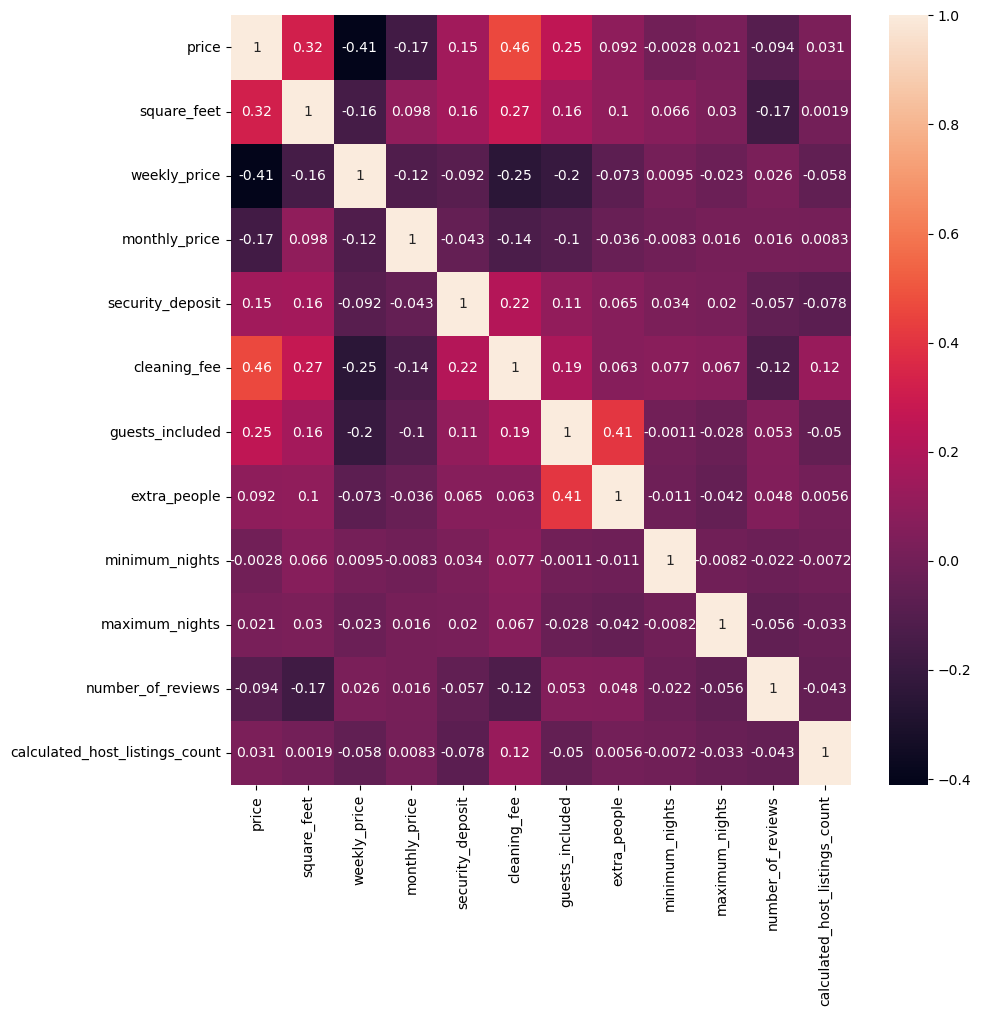

In [12]:
# check out the correlation of sub_list
# create a subplot with matplotlib
f,ax = plt.subplots(figsize = (10, 10))
#create a correlation heatmap in seaborn in the above subplot
corr_list = sns.heatmap(sub_list.corr(), annot = True, ax = ax)

#### Discuss what the coefficients in the plot mean in terms of the relationships between the variables. 


The vast majority of variables have  correlation coefficients very close to 0, meaning that they have very weak relationships. 


The strongest positive relationsips are price / cleaning_fee, price / square_feet and guest_included / extra_fee 

The strongest negative relationships are price / weekly_price & cleaning_fee / weekly_price

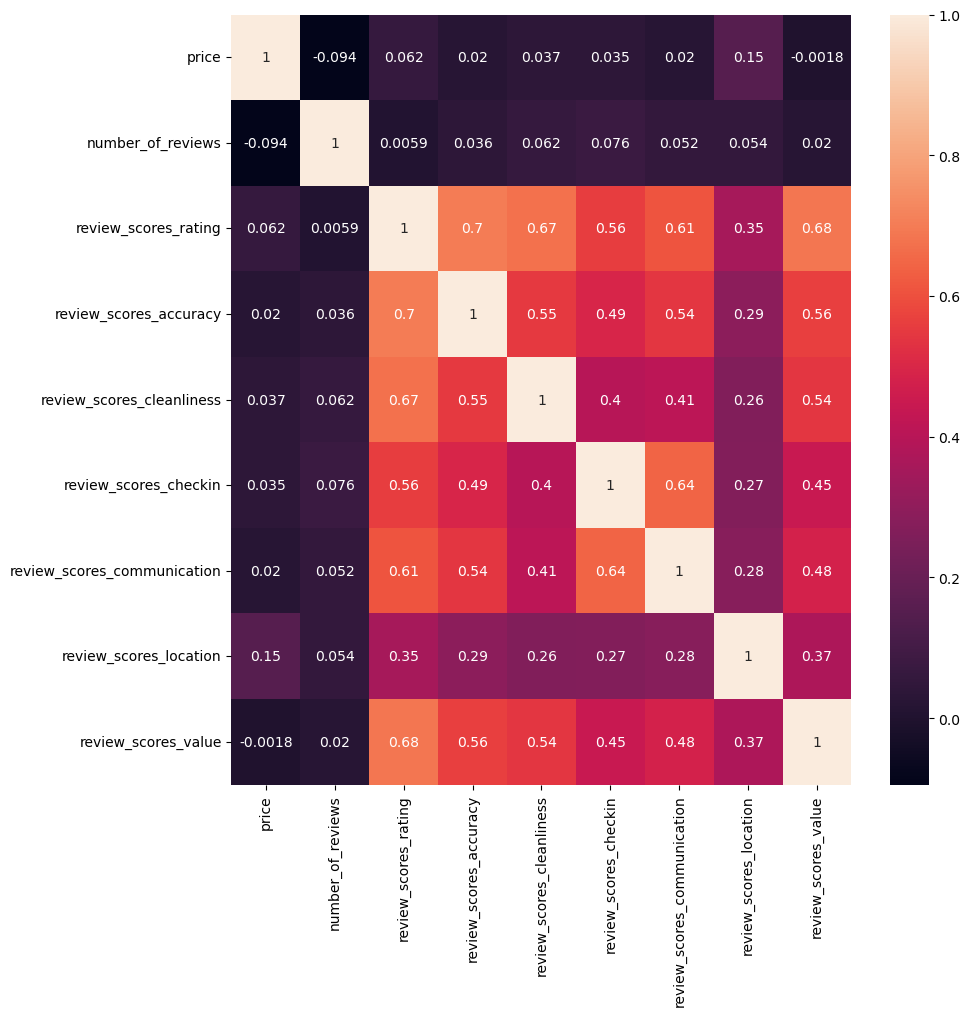

In [13]:
# then for sub_rate
# create a subplot with matplotlib
f,ax = plt.subplots(figsize = (10, 10))
#create a correlation heatmap in seaborn in the above subplot
corr_rate = sns.heatmap(sub_rate.corr(), annot = True, ax = ax)

#### Discuss what the coefficients in the plot mean in terms of the relationships between the variables. 


In this case, there are no negative relationships greater than -0.1


So I assume that a higher rating in one category will be met with a higher rating in the other categories too. 


The strongest relationships are between review_scores_rating and each of, accuracy, cleanliness & communication. 

Interestingly there is a weaker relationship between location scores and the other categories. 

### Scatterplots:


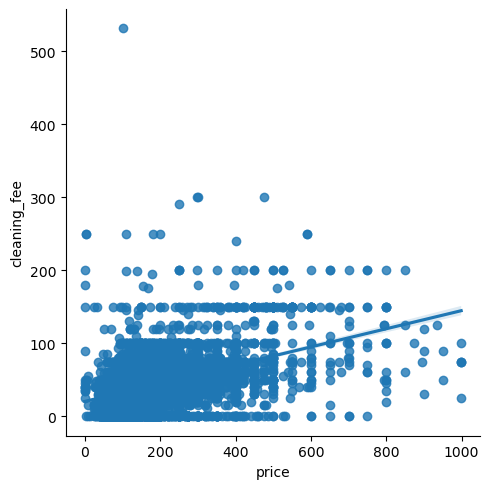

In [14]:
# create a scaterplot for price and cleaning fee
sns.lmplot(x = 'price', y = 'cleaning_fee', data = df)

While the regression line is reasonably steep, the points are not tightly grouped. It will be interesting to check out that outlier of the unusually high cleaning fee. 


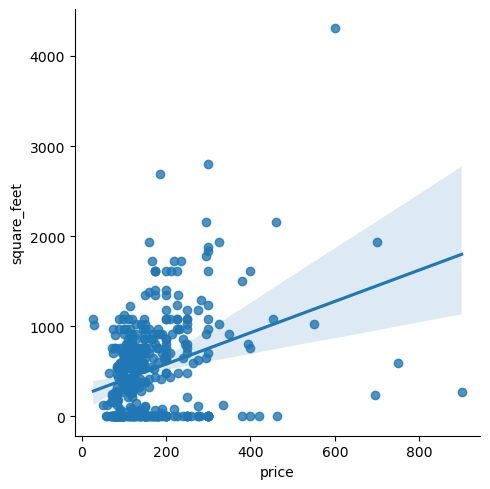

In [15]:
# create a scaterplot for price and square_feet
sns.lmplot(x = 'price', y = 'square_feet', data = df)

Again, the line is fairly steep but the points are grouped in areas away from the line meaning the relationship is week. There are very few points in the higher ranges of either variable. 

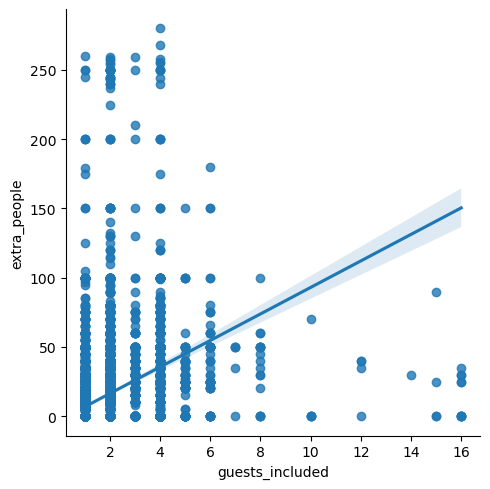

In [16]:
# create a scaterplot for guest_included and extra_people
sns.lmplot(x = 'guests_included', y = 'extra_people', data = df)

Another steep line showing a positive relationship however the points are grouped very far from the line showing that it is a week relationship, infact, the upper-right quadrant of the chart contains no points at all. 

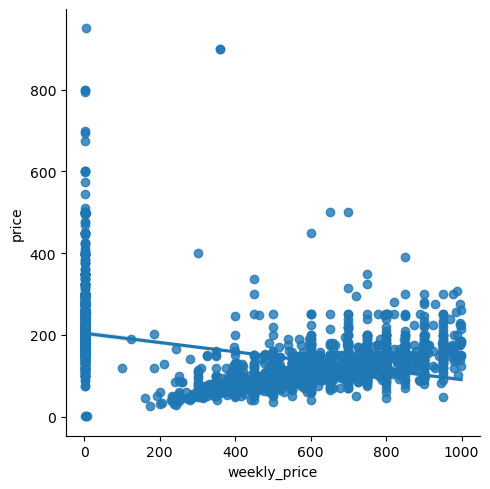

In [17]:
# create a scaterplot for price and weekly_price
sns.lmplot(x = 'weekly_price', y = 'price', data = df)

Here is a tale of two stories. The regression line shows a negative relationship, however it would seem that the majority of the points are scattered around an imaginary positive relationship line. If we exclude those properties without a weekly price, I suspect we'll see something different. 

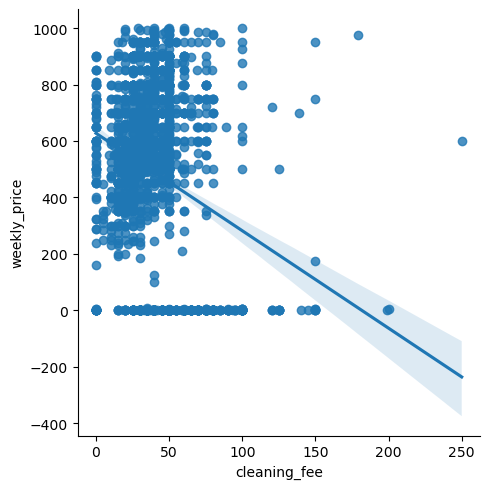

In [18]:
# create a scaterplot for cleaning fee weekly_price
sns.lmplot(x = 'cleaning_fee', y = 'weekly_price', data = df)

Again, I feel that If we exclude those without a weekly_price, we'll be seeing a very different picture. Perhaps a weak positive relationship.

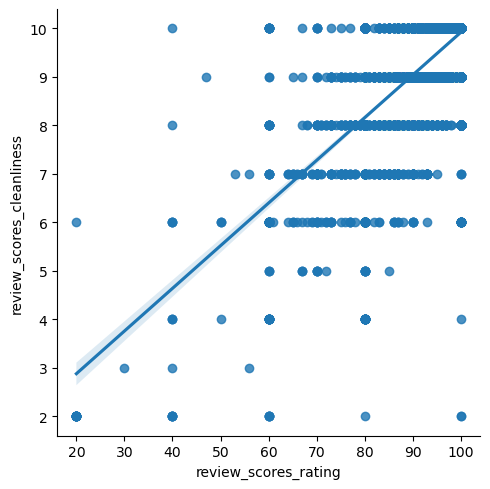

In [19]:
# create a scaterplot for review_scores_rating and review_scores_cleanliness
sns.lmplot(x = 'review_scores_rating', y = 'review_scores_cleanliness', data = df)

With the majority of points grouped in the top right quadrant of the chart, we can see that there are very few low scores in either metric. However it would appear that the relationship between the two is fairly strong and positive

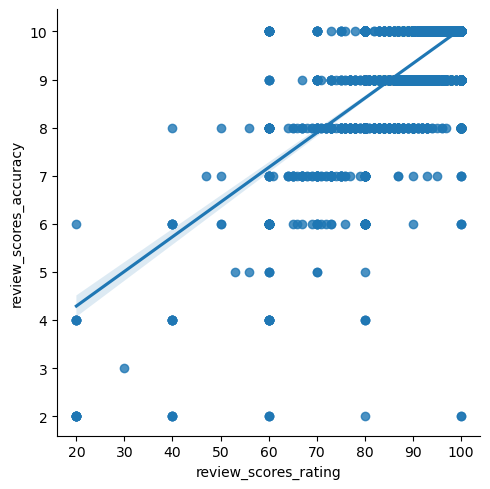

In [20]:
# create a scaterplot for review_scores_rating and review_scores_accuracy
sns.lmplot(x = 'review_scores_rating', y = 'review_scores_accuracy', data = df)

Again, it would seem that the relationship between accuracy scores and overall rating is not particularly strong, but evident. 

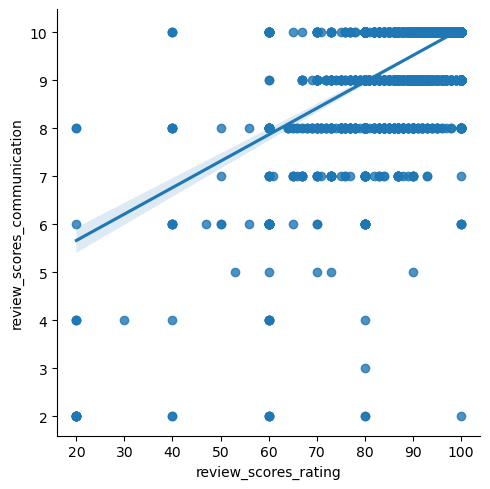

In [21]:
# create a scaterplot for review_scores_rating and review_scores_communication
sns.lmplot(x = 'review_scores_rating', y = 'review_scores_communication', data = df)

The relationship between communication and overall score seems to be a little weaker than the others. 

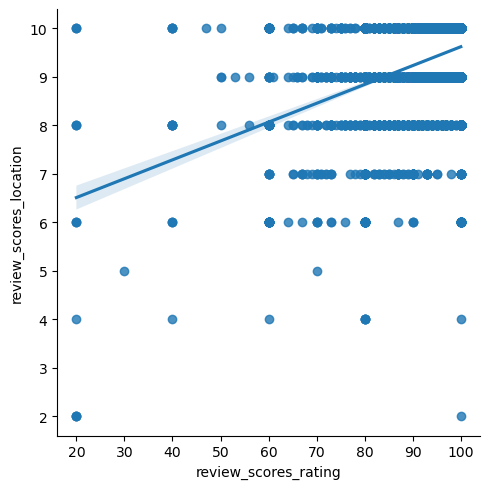

In [22]:
# create a scaterplot for review_scores_rating and review_scores_location
sns.lmplot(x = 'review_scores_rating', y = 'review_scores_location', data = df)

location appears to have fewer very low scores than the other metrics, therefore the impact of the relationship is a little weaker. 

## Create pair plots

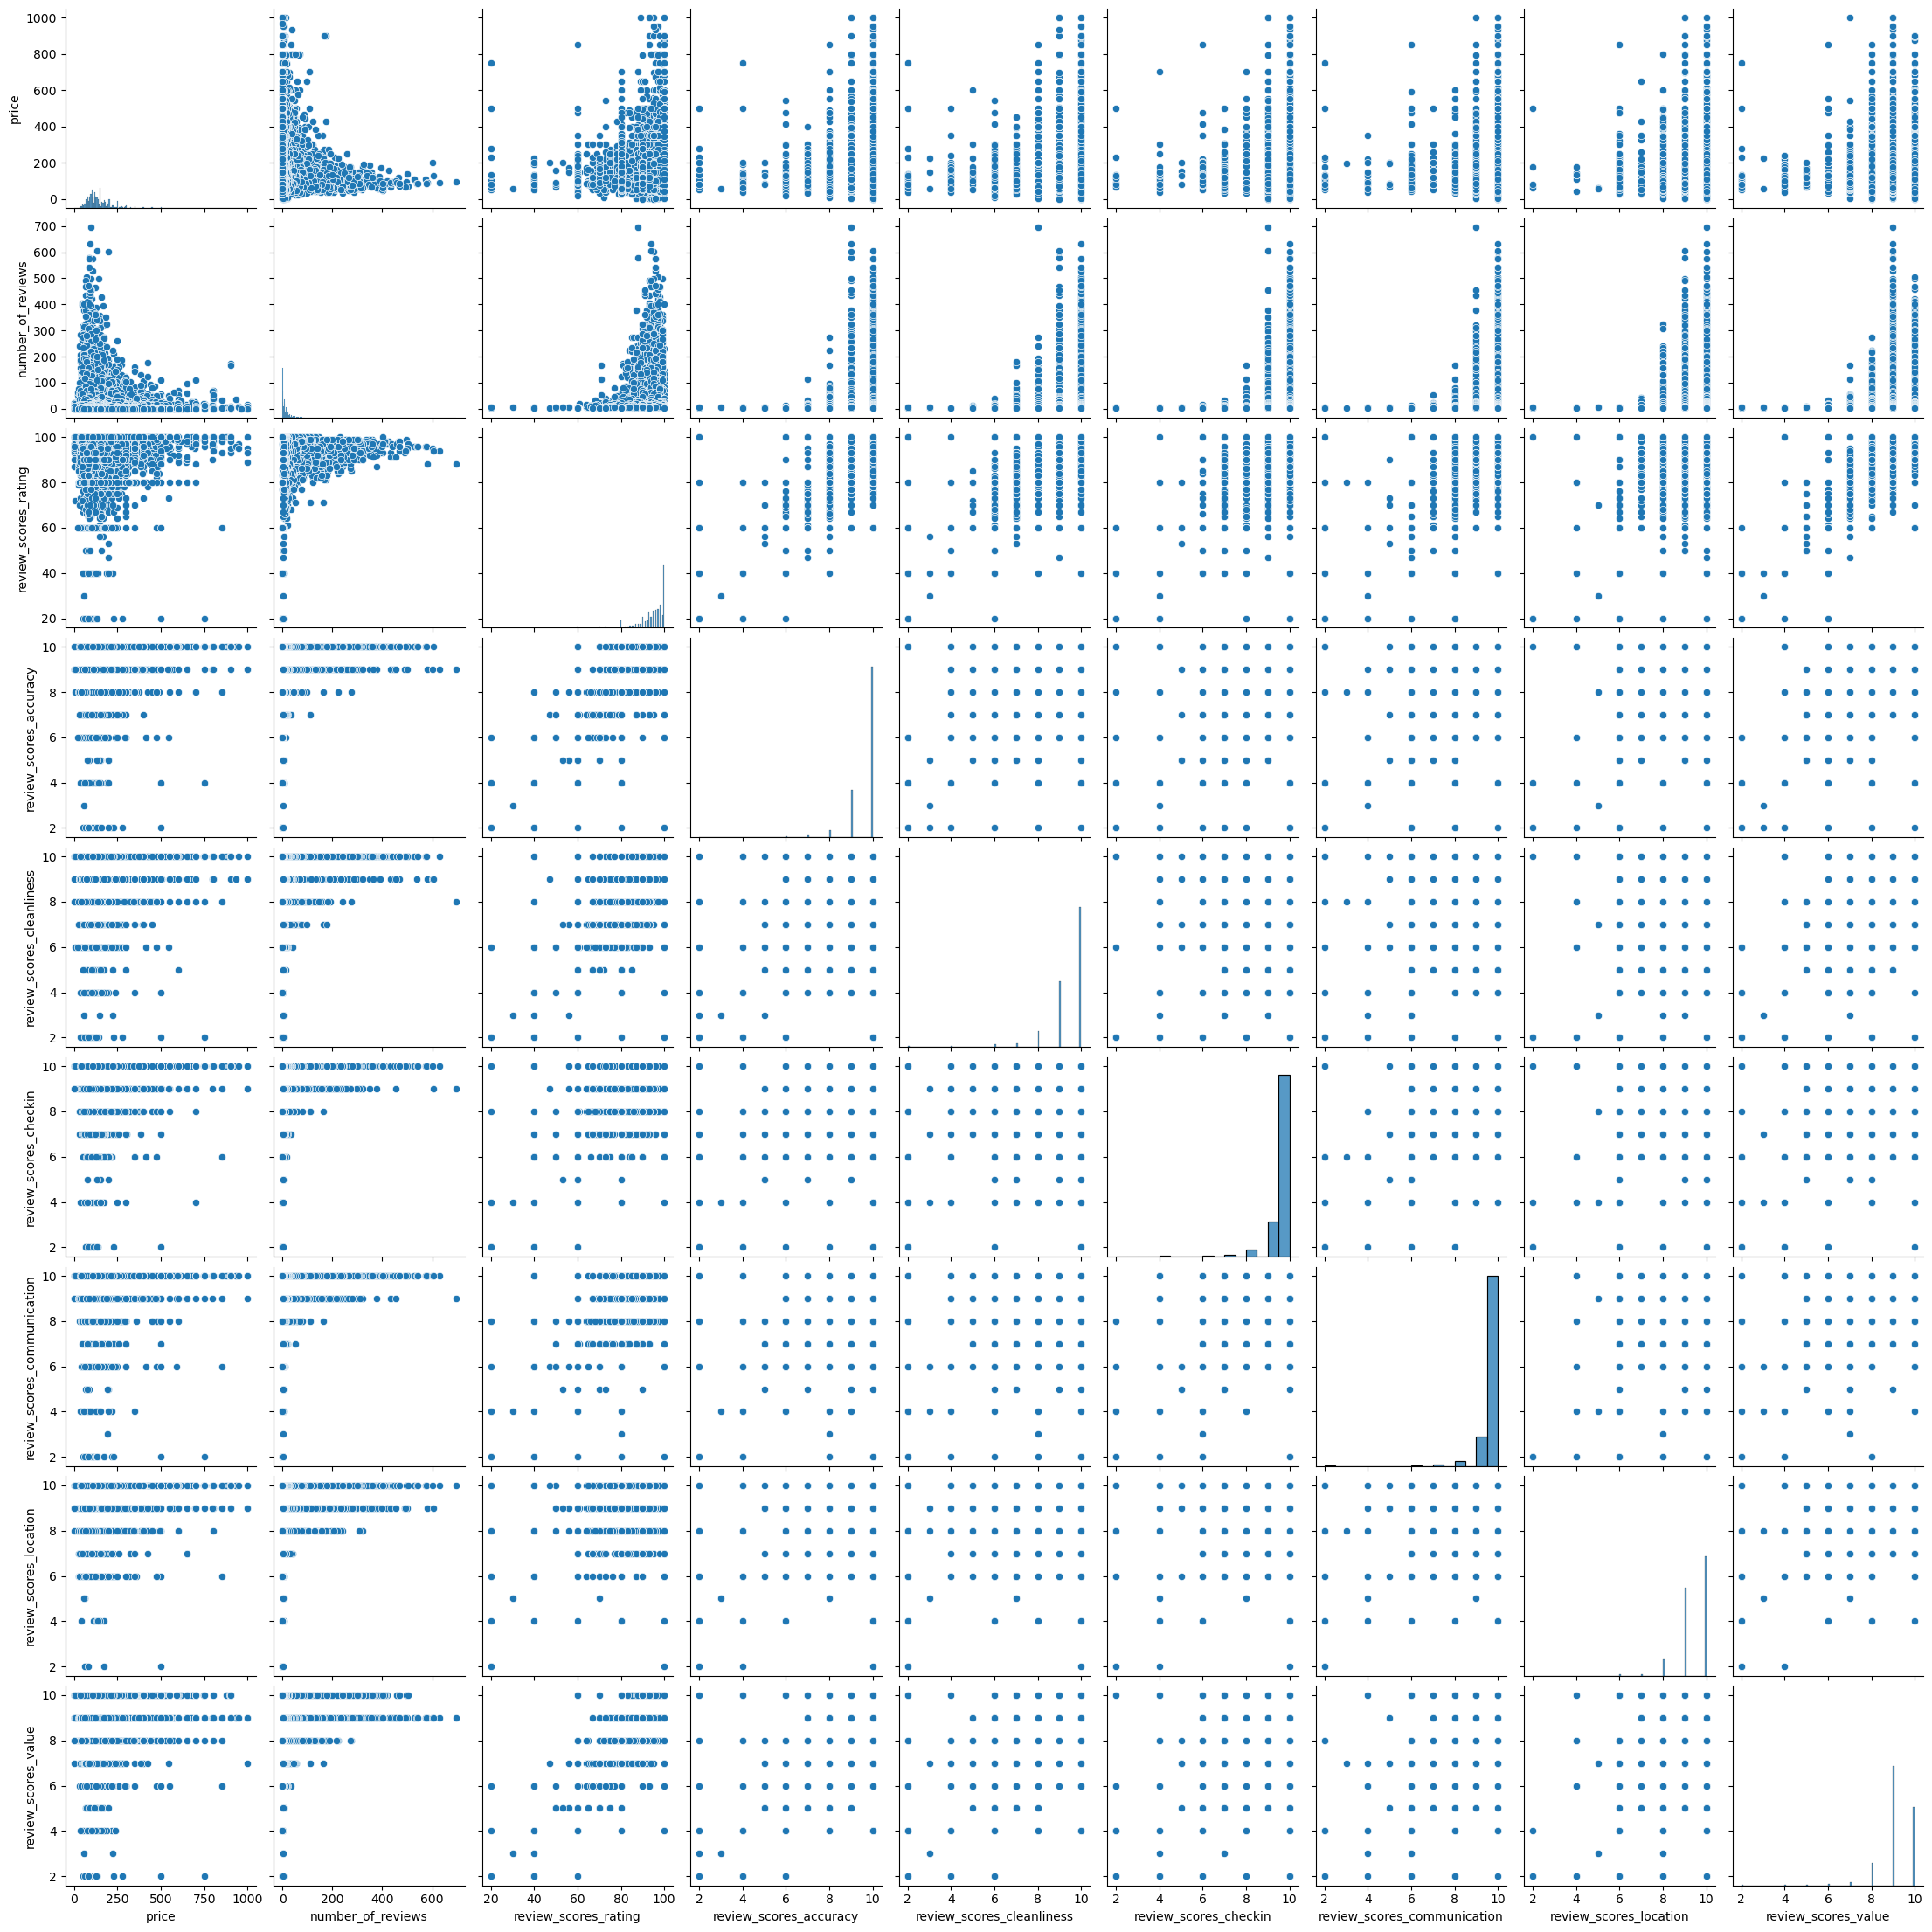

In [23]:
# Create a pair plot for sub_rate

g = sns.pairplot(sub_rate)

Check-in and Communication seem to be the review elements most likely to be given a high score. Price, number of reviews and overall rating are going to be the variables that I am the most interested in exploring further. Although the patterns seem to be fairly consistant across all of the riview variables. 

In [24]:
#save it
g.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'rate_pair.png'))

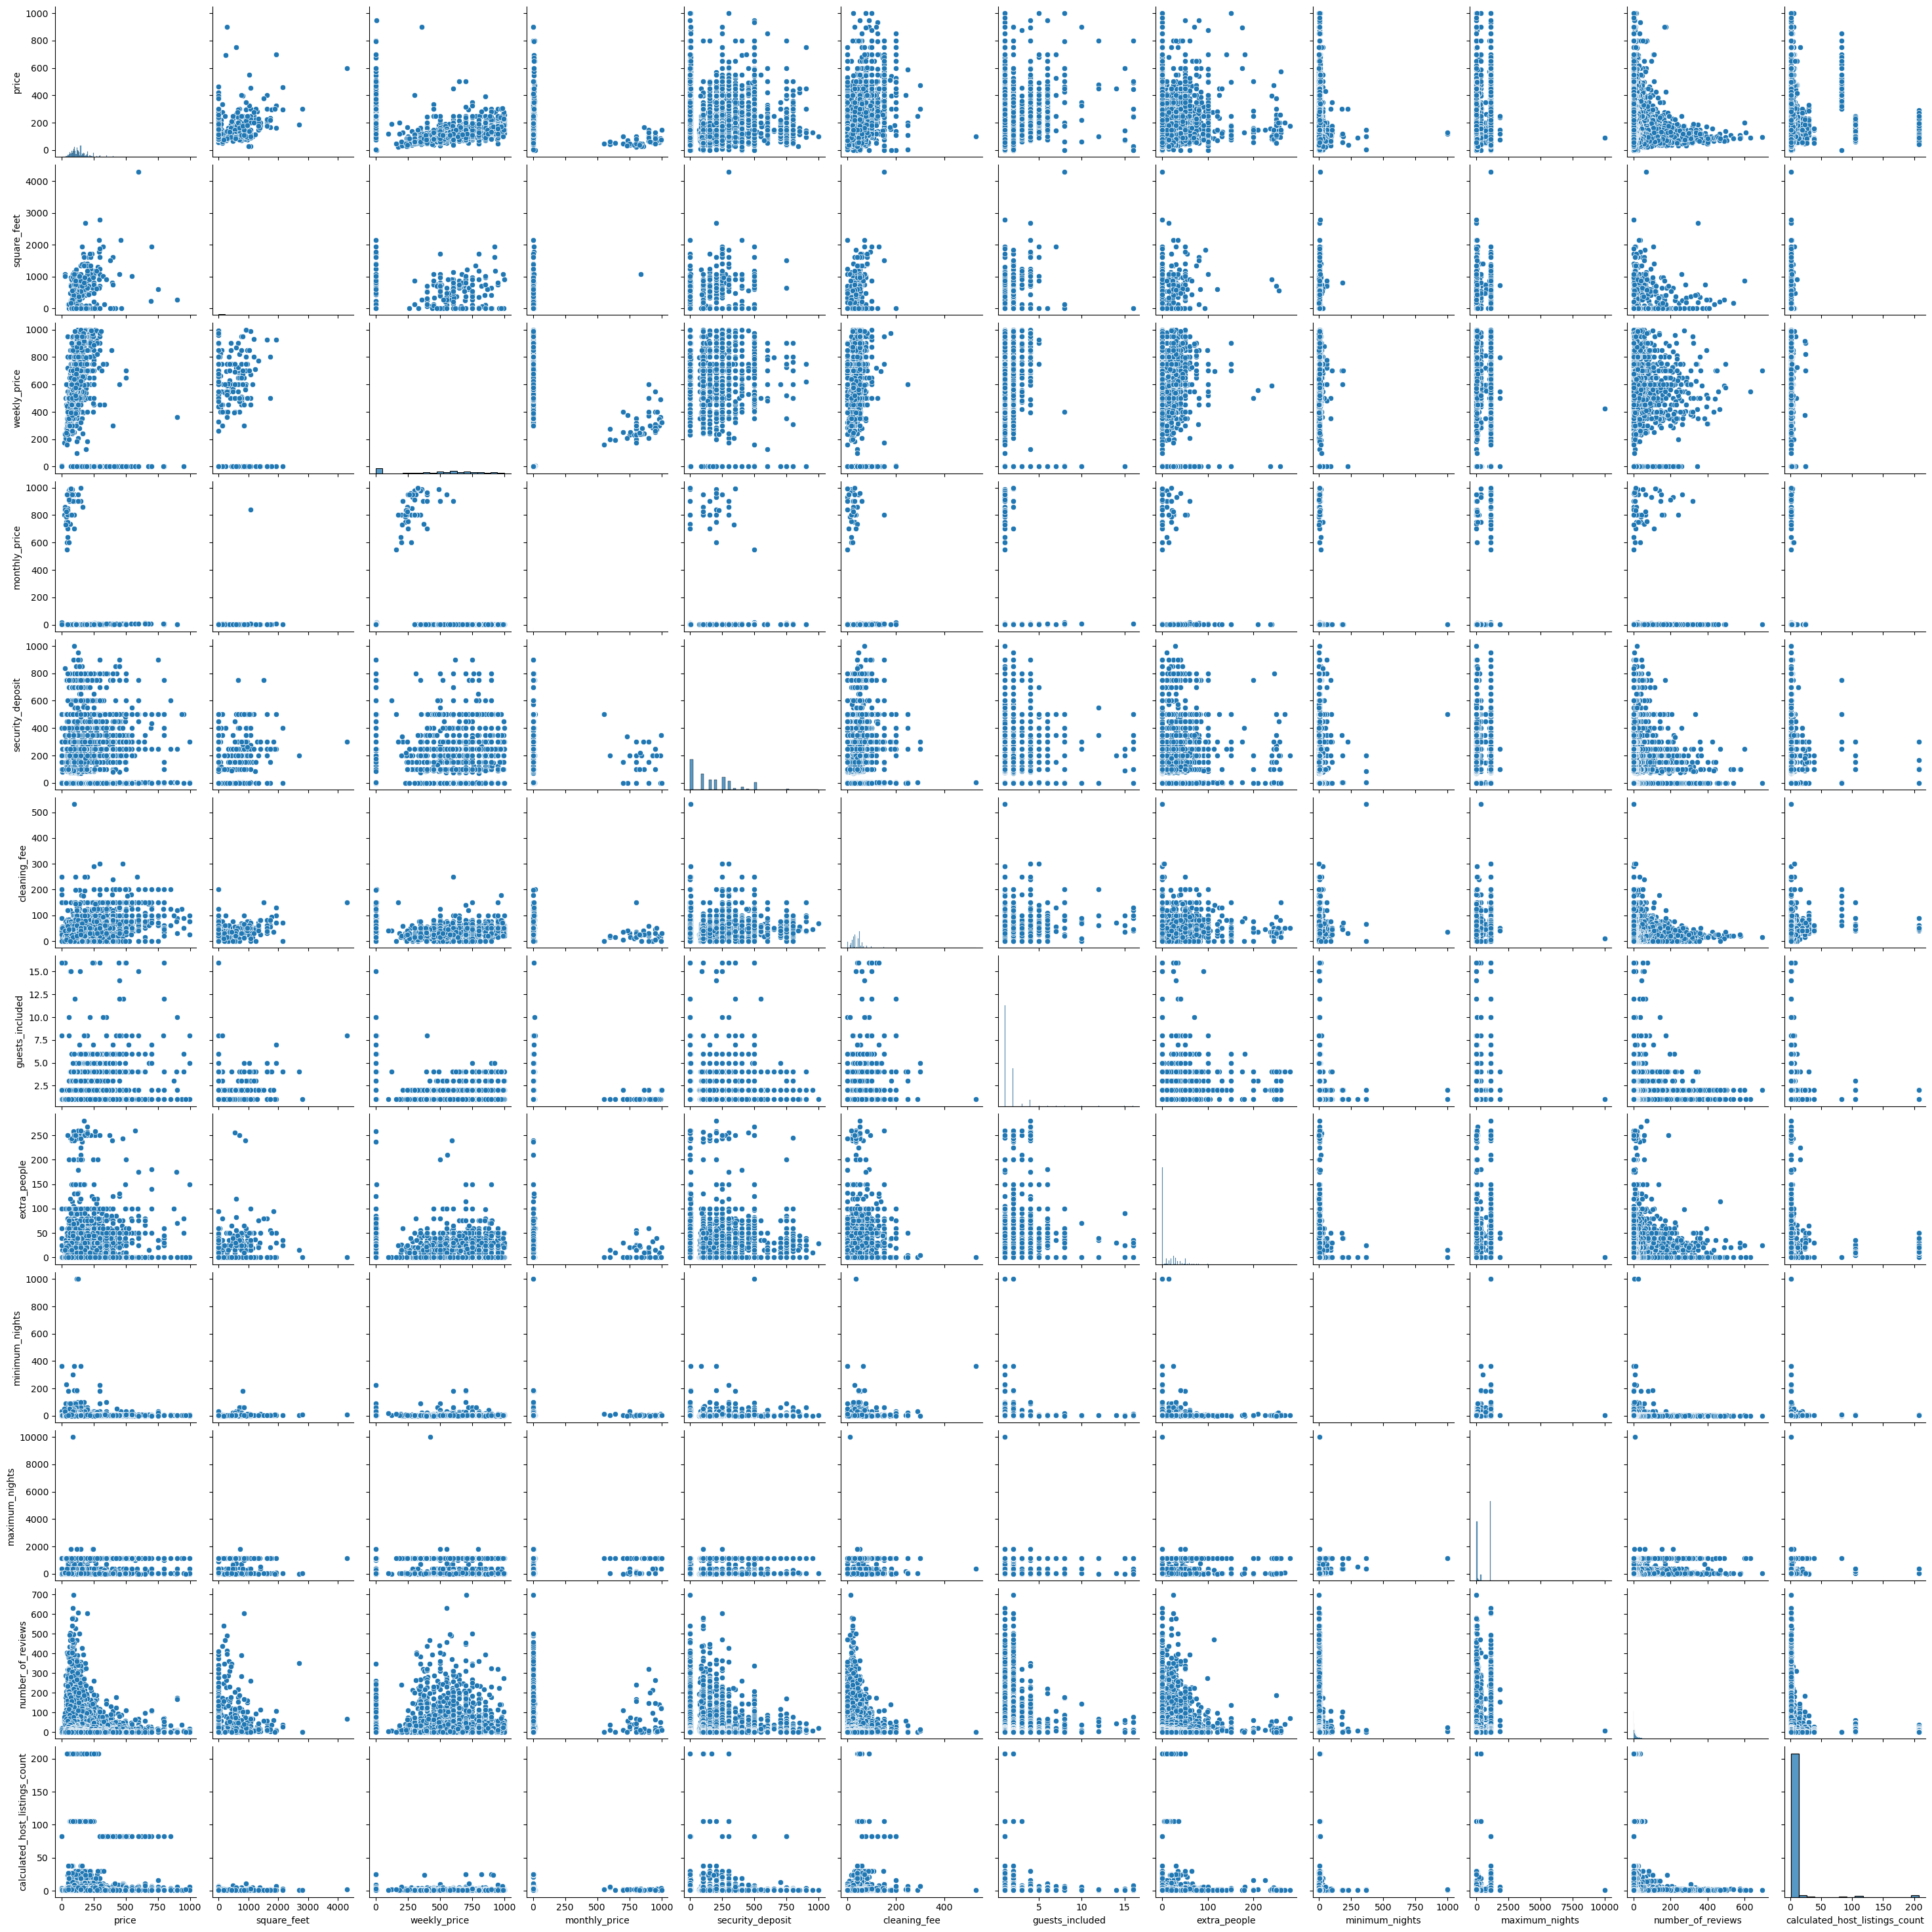

In [25]:
# Create a pair plot for sub_list

f = sns.pairplot(sub_list)

In [26]:
#save it
f.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'list_pair.png'))

The fact that not every property has a weekly fee, monthly fee, security deposit, cleaning fee, or charge for extra people, might be concealing a more significant relationship amongst the properties that do. Again, number of reviews seems to be more interesting than I had thought above. Extra people and guests included also seem like somewhere interesting to look for insights. 

### Create a Categorical plot

##### Creating a categorical variable that splits the "price" column into categories

<Axes: xlabel='price', ylabel='Count'>

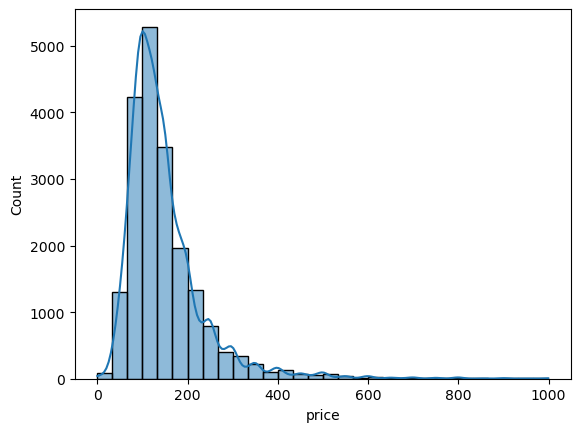

In [27]:
# use a histogram to visualize the distribution of price
sns.histplot(df['price'], bins = 30, kde = True)

In [28]:
df.loc[df['price'] < 80, 'price category'] = 'low price'

In [29]:
df.loc[(df['price'] >= 80) & (df['price'] <= 200), 'price category'] = 'middle price'

In [30]:
df.loc[df['price'] > 200, 'price category'] = 'high price'

In [31]:
df['price category'].value_counts(dropna = False)

price category
middle price    14421
high price       2991
low price        2618
Name: count, dtype: int64

In [32]:
df.columns

Index(['Unnamed: 0', 'id', 'host_id', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'price category'],
      dtype='object')

In [33]:
# drop the extra index
df = df.drop(columns = 'Unnamed: 0')

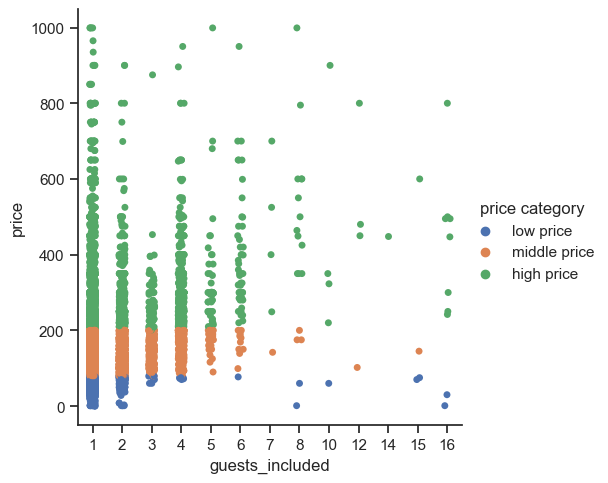

In [34]:
#create a categorical plot in seaborn using the price categories created above
sns.set(style = 'ticks')
h = sns.catplot(x = 'guests_included', y = 'price', hue = 'price category', data = df)

There aren't many properties which include over 6 guests. However those that do are much more likely to be 'high price' properties.  

## 4. Questions so far?

### Questions from 6.1 which have found an answer

#### Are reviews generally consistent across the categories? Is one or more categories more likely to get the low 2?

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'number_of_reviews'}>,
        <Axes: title={'center': 'review_scores_rating'}>],
       [<Axes: title={'center': 'review_scores_accuracy'}>,
        <Axes: title={'center': 'review_scores_cleanliness'}>,
        <Axes: title={'center': 'review_scores_checkin'}>],
       [<Axes: title={'center': 'review_scores_communication'}>,
        <Axes: title={'center': 'review_scores_location'}>,
        <Axes: title={'center': 'review_scores_value'}>]], dtype=object)

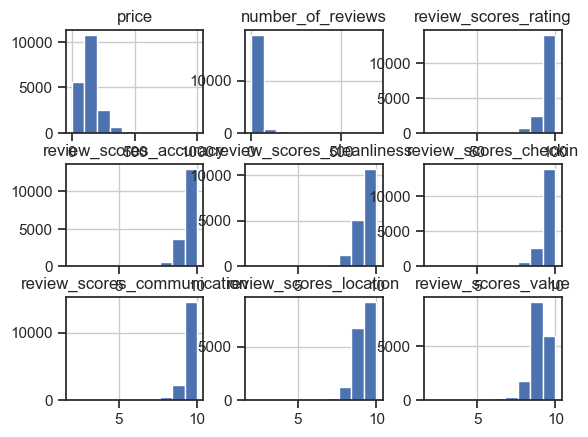

In [35]:
# quick recap of the review histograms
sub_rate.hist()

Communication and Check-in are less likely to have the lower scores. In generall though the scores in all categories tend to be high. There seems to be a reasonable pattern that lower scores in one category are related to lower scores across all categories. 

#### Is there a link between the price of a property and its review ratings?

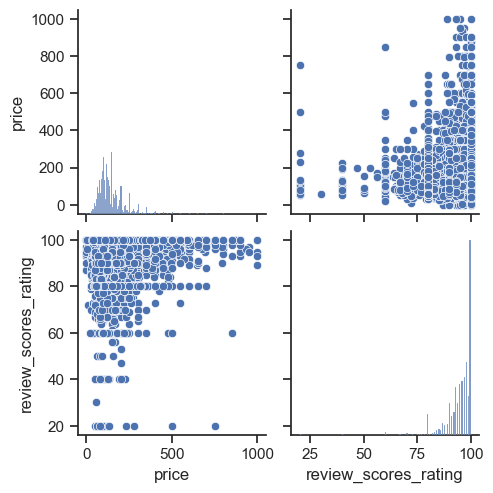

In [36]:
sns.pairplot(sub_rate[['price', 'review_scores_rating']])

It seems there may be a relationship between price and review_scores_rating. There are very few properties with a low review_scores_rating. However, those that do have a low score are much more likely to be a low price property. 

#### Are the low ratings consistently for one type or price range of property?


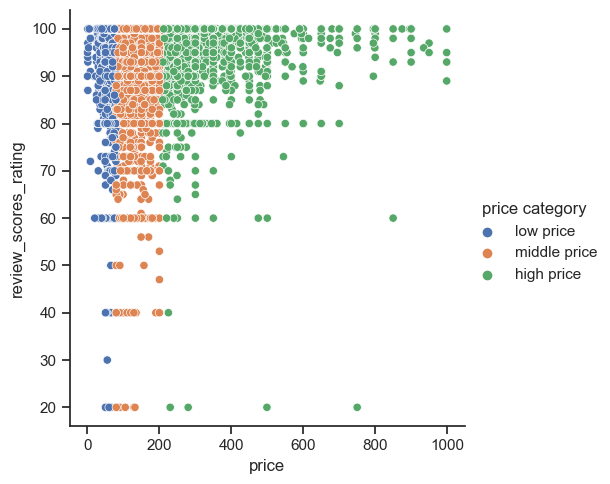

In [37]:
# create a relplot of price and review_scores_rating with price categories. 
sns.relplot(x = 'price', y = 'review_scores_rating', hue = 'price category', data = df)

Again, as above, we can see that there are very few 'high price' properties with low review scores. 

#### Further Questions

Do High Price properties tend to have fewer reviews because they are rented out less often? Available less often?

## 5. Hypotheses so far

If a property has fewer reviews, then it will be more expensive.

If a host is a superhost, then the property will have higher mean reviews.

If a property has a low score in 'communication' or 'checkin' then it will have low scores in all other categories too. 

If a property has a review score under 60, then the property is not a high-price property.

In [38]:
# export df with category
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'numeric_price_cat.csv'))

In [39]:
df.columns

Index(['id', 'host_id', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'price category'],
      dtype='object')